# Lista 1 (9 pkt.)

In [2]:
import string
import math
import matplotlib.pyplot as plt

## Zadanie 1 (1 pkt.)

Zaimplementuj szyfr Cezara. Napisz funkcję **Cezar(tekst, klucz)** tak aby jako argumenty przyjmowała tekst do zaszyfrowania oraz klucz a zwracała zaszyfrowany tekst. Funkcja ta dostając jako argumenty zaszyfrowany tekst oraz **-klucz** (klucz, ktorym zaszyfrowano tekst ze znakiem minus) będzie zwracała odszyfrowany tekst. Funkcja powinna przejść testy, czyli powinna 8 razy zwrócić **True**.

Pamiętaj o polskich znakach. Szyfrujemy tylko litery, natomiast cyfry, znaki interpunkcyjne i białe znaki zostają bez zmian. Wielkie litery po zaszyfrowaniu są również wielkie. Użyj poniższego alfabetu.

In [3]:
alfabet = ['a', 'ą', 'b', 'c', 'ć', 'd', 'e', 'ę', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'ł', 'm',
           'n', 'ń', 'o', 'ó', 'p', 'q', 'r', 's', 'ś', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ź', 'ż']

Przy implementacji mogą być przydatne takie elementy biblioteki string jak: **string.punctuation, string.whitespace, string.digits, upper(), lower(), isupper()**

In [4]:
def Cezar(text: str, key: int) -> str:
    encoded_text = str()
    for current_char in text:
        if current_char in string.punctuation or current_char in string.whitespace or current_char in string.digits:
            encoded_text += current_char
        elif current_char.lower() in alfabet:
            current_char_number = alfabet.index(current_char.lower())
            if current_char.isupper():
                encoded_text += alfabet[(current_char_number + key) % len(alfabet)].upper()
                continue
            encoded_text += alfabet[(current_char_number + key) % len(alfabet)]
    return encoded_text

In [5]:
print(Cezar('Ala ma kota.', 3) == 'Cnc oc mqwc.')
print(Cezar('Ala ma kota.', 20) == 'Óżó ąó źćió.')
print(Cezar('Ala ma 2 koty.', 5) == 'Dod pd 2 ńsyą.')
print(
    Cezar('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.',
          7)
    == 'Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.')
print(Cezar('Cnc oc mqwc.', -3) == 'Ala ma kota.')
print(Cezar('Óżó ąó źćió.', -20) == 'Ala ma kota.')
print(Cezar('Dod pd 2 ńsyą.', -5) == 'Ala ma 2 koty.')
print(
    Cezar('Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.',
          -7)
    == 'Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 2 (1 pkt.)

Wiedząc, że poniższy tekst zaszyfrowano metodą Cezara, odszyfruj go metodą "brute force". Co to za cytat?

In [6]:
tekst = 'Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.'

In [7]:
def decode(text: str):
    for key in range(len(alfabet)):
        decoded_text = ''
        for current_char in text:
            if current_char in string.punctuation or current_char in string.whitespace or current_char in string.digits:
                decoded_text += current_char
            elif current_char.lower() in alfabet:
                current_char_number = alfabet.index(current_char.lower())
                if current_char.isupper():
                    decoded_text += alfabet[(current_char_number + key) % len(alfabet)].upper()
                    continue
                decoded_text += alfabet[(current_char_number + key) % len(alfabet)]
        print(f'{key + 1}:', decoded_text)


decode(tekst)  # 29

1: Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.
2: Idćsęl ólzż idfz? Ólźqo śopż sśol u żu śol wćżf, bols. Ólźqo wćżfógilsa azoraół bćżrasfidćj, śol bols.
3: Jedśfł płźa jegź? Płżró tóqa śtół v av tół xdag, cółś. Płżró xdagphjłśą ąźósąpm cdasąśgjedk, tół cółś.
4: Kęetgm qmżą kęhż? Qmasp uprą tupm w ąw upm yeąh, ćpmt. Qmasp yeąhqikmtb bżpśbqn ćeąśbthkęel, upm ćpmt.
5: Lfęuhn rnab lfia? Rnąśq vqsb uvqn x bx vqn zębi, dqnu. Rnąśq zębirjlnuc caqtcrń dębtcuilfęł, vqn dqnu.
6: Łgfviń sńąc łgją? Sńbtr wrśc vwrń y cy wrń źfcj, erńv. Sńbtr źfcjskłńvć ćąrućso efcućvjłgfm, wrń erńv.
7: Mhgwjo śobć mhkb? Śocus xstć wxso z ćz xso żgćk, ęsow. Śocus żgćkślmowd dbsvdśó ęgćvdwkmhgn, xso ęsow.
8: Nihxkó tócd nilc? Tóćvś yśud xyśó ź dź yśó ahdl, fśóx. Tóćvś ahdltłnóxe ecśwetp fhdwexlnihń, yśó fśóx.
9: Ńjiylp upće ńjłć? Updwt ztve yztp ż eż ztp ąieł, gtpy. Updwt ąiełumńpyę ęćtxęuq giexęyłńjio, ztp gtpy.
10: Okjzłq vqdę okmd? Vqexu źuwę zźuq a ęa źuq

## Zadanie 3 (2 pkt.)

Plik **'ksiazka1.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Cezara. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Do wczytania pliku możesz użyć poniższego kodu.

In [8]:
file = open('ksiazka1.txt', encoding='utf8')
book = file.read()
file.close()

Słownik **czestoliwosc** zawiera częstotliwości występowania liter w języku polskim.

In [9]:
polish_frequency = {'a': 0.0891, 'ą': 0.0099, 'b': 0.0147, 'c': 0.0396, 'ć': 0.004, 'd': 0.0325, 'e': 0.0766,
                    'ę': 0.0111,
                    'f': 0.003,
                    'g': 0.0142, 'h': 0.0108, 'i': 0.0821, 'j': 0.0228, 'k': 0.0351, 'l': 0.021, 'ł': 0.0182,
                    'm': 0.028,
                    'n': 0.0552,
                    'ń': 0.002, 'o': 0.0775, 'ó': 0.0085, 'p': 0.0313, 'q': 0.0014, 'r': 0.0469, 's': 0.0432,
                    'ś': 0.0066,
                    't': 0.0398,
                    'u': 0.025, 'v': 0.0004, 'w': 0.0465, 'x': 0.0002, 'y': 0.0376, 'z': 0.0564, 'ź': 0.0006,
                    'ż': 0.0083}

<BarContainer object of 35 artists>

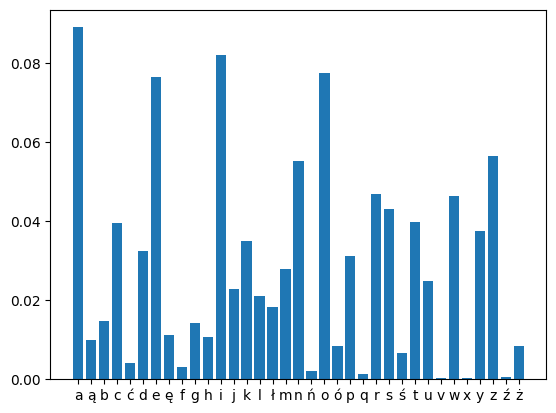

In [10]:
plt.bar(polish_frequency.keys(), polish_frequency.values())

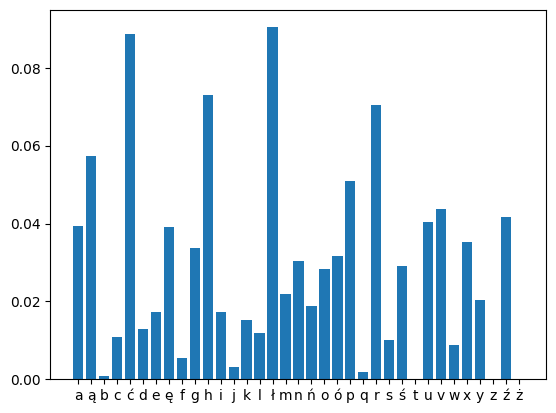

In [11]:
book_frequency = {char: 0 for char in alfabet}

table = str.maketrans('', '', string.whitespace + string.punctuation + string.digits)
raw_text = book.translate(table)


def book_analyzer(text):
    amount = 0
    for char in text:
        if char.isupper():
            char = char.lower()
        book_frequency[char] += 1
        amount += 1
    for key in book_frequency:
        book_frequency[key] = book_frequency[key] / amount

    plt.bar(book_frequency.keys(), book_frequency.values())
    plt.show()


book_analyzer(raw_text)

In [12]:
def calculate_polish_score(text):
    text = text[:20000].lower()
    total_difference = 0

    for char in text:
        expected_freq = polish_frequency[char]
        total_difference += abs(expected_freq - (text.count(char) / len(text)))

    score = total_difference / len(alfabet)

    return score

In [13]:
def decode_og(text, offset):
    decoded_text = ''
    for current_char in text:
        if current_char in string.punctuation or current_char in string.whitespace or current_char in string.digits:
            decoded_text += current_char
        elif current_char.lower() in alfabet:
            current_char_number = alfabet.index(current_char.lower())
            if current_char.isupper():
                decoded_text += alfabet[(current_char_number + offset) % len(alfabet)].upper()
                continue
            decoded_text += alfabet[(current_char_number + offset) % len(alfabet)]
    return decoded_text

In [14]:
def break_cipher(cipher_text: str) -> int:
    lowest_difference = math.inf
    encryption_key = 0
    
    for key in range(-10, 10):
        current_plain_text = decode_og(cipher_text, key)
        current_difference = calculate_polish_score(current_plain_text)
        print(f'Iteration {key}: {current_difference}')
        if current_difference < lowest_difference:
            lowest_difference = current_difference
            encryption_key = key
    return encryption_key


break_cipher(raw_text)

-10
Iteration -10: 15.50662285714252
-9
Iteration -9: 18.885468571430216
-8
Iteration -8: 22.385622857141847
-7
Iteration -7: 17.937565714285935
-6
Iteration -6: 21.4251028571455
-5
Iteration -5: 22.87493428571446
-4
Iteration -4: 2.0230885714285716
-3
Iteration -3: 23.21037714285648
-2
Iteration -2: 19.923580000000783
-1
Iteration -1: 20.1145742857159
0
Iteration 0: 23.56238571428511
1
Iteration 1: 18.295399999999237
2
Iteration 2: 15.557231428569516
3
Iteration 3: 20.853228571429828
4
Iteration 4: 17.56782571428613
5
Iteration 5: 21.436097142857722
6
Iteration 6: 20.055491428573003
7
Iteration 7: 18.448682857143353
8
Iteration 8: 19.88913428571377
9
Iteration 9: 16.20747714285602


-4

In [15]:
decode_og(book[:100], -4)

'Tom I\n\n\n\nWstęp\n\nW północno-wschodnim kącie Afryki leży Egipt, ojczyzna najstarszej cywilizacji w świ'

## Zadanie 4 (2 pkt.)

Napisz dwie funkcje, szyfrującą i deszyfrującą, dla szyfru Vignere'a. Funkcja **Vignere_zaszyfruj(tekst, klucz)** przyjmuje jako argumenty tekst do zaszyfrowania oraz klucz w postaci słowa. Podobnie funkcja **Vignere_odszyfruj(tekst, klucz)** przyjmuje jako argumenty tekst zaszyfrowany oraz klucz w postaci słowa. Może być przydatne skorzystanie z zamiany liter na liczby (tzn. na liczby określające pozycję litery w alfabecie):

In [16]:
num_to_char = dict()
char_to_num = dict()
for i, l in enumerate(alfabet):
    num_to_char[i] = l
    char_to_num[l] = i

In [17]:
class Vigenere:
    def encode(self, text: str, key: str) -> str:
        is_upper = False
        encoded_text = ''
        offset = 0

        for current_char in text:
            if current_char in string.punctuation or current_char in string.whitespace or current_char in string.digits:
                encoded_text += current_char
                continue
            elif current_char.isupper():
                current_char = current_char.lower()
                is_upper = True

            x = char_to_num[current_char]
            y = char_to_num[key[offset % len(key)]]
            xy = x + y
            if xy < len(alfabet):
                temp = num_to_char[xy]
            else:
                temp = num_to_char[abs(len(alfabet) - xy)]
            if is_upper:
                encoded_text += temp.upper()
                is_upper = False
            else:
                encoded_text += temp
            offset += 1

        return encoded_text

    def decode(self, text, key):
        decoded_text = ''

        for char in key:
            decoded_text += num_to_char[(len(alfabet) - char_to_num[char]) % len(alfabet)]

        return self.encode(text, decoded_text)

In [18]:
vigenere = Vigenere()

print(vigenere.encode('Ala ma kota.', 'ela') == 'Eva ql kśda.')
print(vigenere.encode('Ala ma kota.', 'tygrys') == 'Thg ćy bhqg.')
print(vigenere.encode('Ala ma 2 koty.', 'indywidualistyczny') == 'Iyd jw 2 ssńy.')
print(vigenere.encode(
    'Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.',
    'asnyk')
      == 'Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.')
print(vigenere.decode('Eva ql kśda.', 'ela') == 'Ala ma kota.')
print(vigenere.decode('Thg ćy bhqg.', 'tygrys') == 'Ala ma kota.')
print(vigenere.decode('Iyd jw 2 ssńy.', 'indywidualistyczny') == 'Ala ma 2 koty.')
print(vigenere.decode(
    'Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.',
    'asnyk')
      == 'Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 5 (3 pkt.)

Plik **'ksiazka2.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Vignere'a. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Wskazówka I: Zauważ, że w metodzie Vignere'a co $n$-ta litera (gdzie $n$ to długość klucza) jest zaszyfrowana metodą Cezara.

Wskazówka II: Najpierw ustal długość klucza $n$.

Do wczytania pliku możesz użyć poniższego kodu.

In [19]:
file = open('ksiazka2.txt', encoding='utf8')
book = file.read()
file.close()
table = str.maketrans('', '', string.whitespace + string.punctuation + string.digits)
raw_text = book.translate(table)

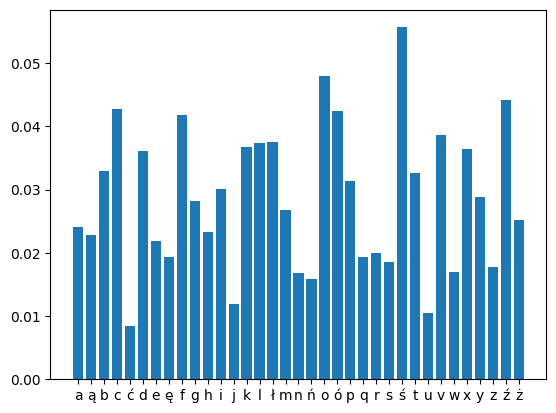

In [20]:
char_freq = book_analyzer(raw_text)

In [21]:
def calculate_ic(text):
    text = text.lower()
    total = len(text)
    alphabet_size = len(alfabet)
    freq_count = [0] * alphabet_size

    for char in text:
        if char in alfabet:
            char_index = char_to_num[char]
            freq_count[char_index] += 1

    ic = sum((n * (n - 1) for n in freq_count)) / (total * (total - 1))
    return ic

In [22]:
def estimate_key_length(ciphertext, max_key_length):
    estimated_lengths = []

    for k in range(1, max_key_length + 1):
        ic_values = []
        for i in range(k):
            position_chars = [ciphertext[j] for j in range(i, len(ciphertext), k)]
            position_text = ''.join(position_chars)
            ic = calculate_ic(position_text)
            ic_values.append(ic)

        avg_ic = sum(ic_values) / k

        if avg_ic > 0.04:
            print(avg_ic)
            estimated_lengths.append(k)

    return estimated_lengths


estimate_key_length(raw_text, 20)

0.049526338920867996
0.04952675115090922
0.049528292945091625
0.04952315299241336
0.049527483546440466


[4, 8, 12, 16, 20]

In [23]:
def find_vigenere_key(ciphertext, key_length):
    key = ''

    for i in range(key_length):
        group = ciphertext[i::key_length]
        frequencies = {char: 0 for char in alfabet}
        for char in group:
            if char in alfabet:
                frequencies[char] += 1
        most_frequent_char = max(frequencies, key=frequencies.get)
        key += most_frequent_char

    return key


find_vigenere_key(raw_text, 4)

'glob'

In [24]:
vigenere.decode(book[:100], 'glob')

'Rozdział I. Phileas Fogg, zachwycony Obieżyświatem, przyjmuje go do służby\n\nW roku 1872 dom pod nume'